In [132]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
import numpy as np
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [2]:
conn = psycopg2.connect("user=postgres password=admin port=5432")
conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = conn.cursor()

In [3]:
casos_covid = pd.read_sql_query('''
select * from casos_covid cc
join localizacao l on l.casos_covid_idcasos_covid = cc.idcasos_covid
''', con=conn)

casos_covid['date'] = pd.to_datetime(casos_covid['date'])
casos_covid['casos_covidcol'] = pd.to_datetime(casos_covid['casos_covidcol'])

casos_covid = casos_covid.rename(columns={'casos_covidcol': 'last_available_date'})
casos_covid = casos_covid.astype({
    'last_available_deaths':'int64',
    'last_available_death_rate':'float64'
    })

In [296]:
CIDADES = ['Curitiba', 'Recife', 'Fortaleza', 'Maceió', 'Rio de Janeiro']
casos_covid = casos_covid.query('city in @CIDADES')

df1 = casos_covid[['city', 'estimated_population_2019']].drop_duplicates().sort_values('estimated_population_2019')
df2 = casos_covid.groupby('city')['new_confirmed'].sum().sort_index().to_frame()

total_novos_casos = pd.merge(df1, df2, on=['city'])
total_novos_casos['porcentagem'] = total_novos_casos['new_confirmed'] / total_novos_casos['estimated_population_2019'] * 100

<font size="4">Abaixo podemos ver que que o Rio de Janeiro foi a cidade com maior quantidade de novas casos confirmados</font>

Text(0.5, 1.0, 'Quantidade de Novas Casos por Cidade')

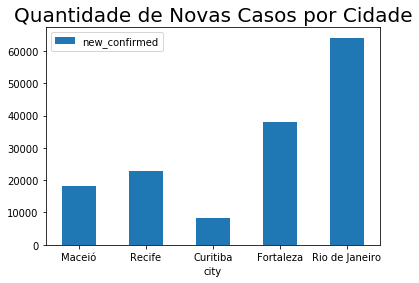

In [297]:
total_novos_casos.plot.bar(x='city', y='new_confirmed', rot=0)
plt.title('Quantidade de Novas Casos por Cidade', fontsize=20)

<font size="4">
Os dois proximos graficos nos mostram que apesar de o Rio de Janeiro ter o mais número de casos, Maceió foi a mais afetada em termos de porcentagem por população, tendo quase 2% da sua população com novas casos confirmados. E dentre todas as 5 cidades analisades tal número corresponde a praticamente 30% do percentual.
</font>

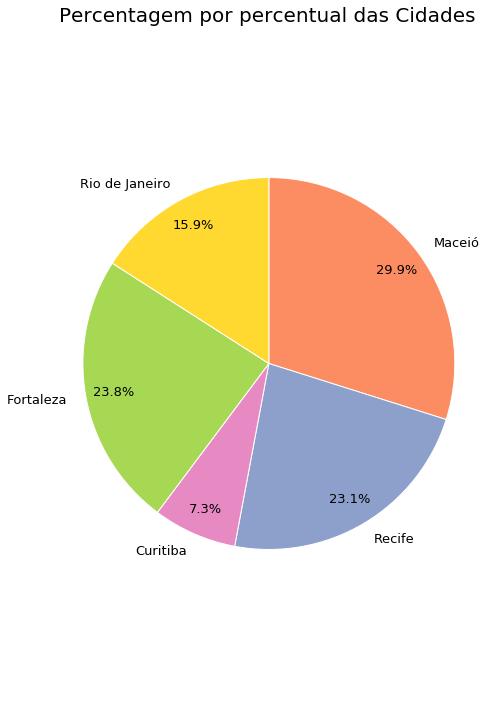

In [298]:
cmap = plt.get_cmap("Set2")
fig1, ax1 = plt.subplots(figsize=(7,10))
ax1.pie(total_novos_casos['porcentagem'],
       labels=list(total_novos_casos['city']),
       radius=1,
       startangle=90,
       explode=[0, 0, 0, 0, 0],
        textprops={'fontsize': 13},
        pctdistance=0.85,
        autopct='%1.1f%%',
       colors=cmap(np.array([1, 2, 3, 4, 5])),
       counterclock=False,
       shadow=False,
       wedgeprops={'edgecolor': 'white'}
       )

ax1.axis('equal')
plt.title('Percentagem por percentual das Cidades', fontsize=20)
plt.tight_layout()

<font size="4">
Agora exibimos o crescimento do numero de casos ao longo dos meses. Importante notar que as cidades atingiram o pico de casos por volta do mês 5 (exceto Rio de Janeiro). Enquanto a partir do mês 5 (em média) o número de casos entrou em decréscimo, no Rio de Janeiro o comportamento foi oposto e permanceu em ascensão até atingir seu pico máximo por volta do mês 6.
</font>

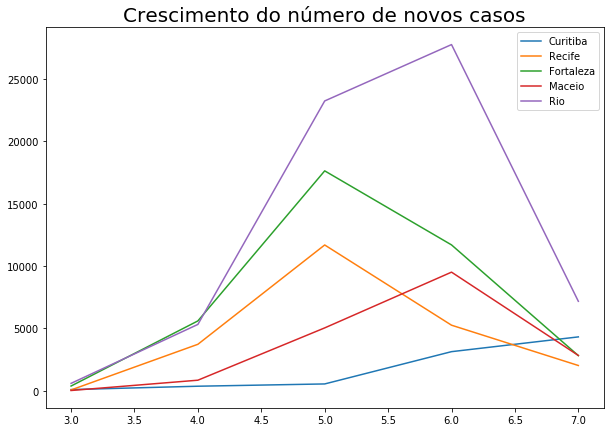

In [299]:
crescimento_casos = casos_covid

curitiba = casos_covid[casos_covid['city'] =='Curitiba']
recife = casos_covid[casos_covid['city'] =='Recife']
fortaleza = casos_covid[casos_covid['city'] =='Fortaleza']
maceio = casos_covid[casos_covid['city'] =='Maceió']
rio = casos_covid[casos_covid['city'] =='Rio de Janeiro']

curitiba.index = pd.to_datetime(curitiba['date'],format='%m/%d/%y %I:%M%p')
curitiba = curitiba.groupby(by=[curitiba.index.month])
curitiba = curitiba['new_confirmed'].sum().sort_index().to_frame()

recife.index = pd.to_datetime(recife['date'],format='%m/%d/%y %I:%M%p')
recife = recife.groupby(by=[recife.index.month])
recife = recife['new_confirmed'].sum().sort_index().to_frame()

fortaleza.index = pd.to_datetime(fortaleza['date'],format='%m/%d/%y %I:%M%p')
fortaleza = fortaleza.groupby(by=[fortaleza.index.month])
fortaleza = fortaleza['new_confirmed'].sum().sort_index().to_frame()

maceio.index = pd.to_datetime(maceio['date'],format='%m/%d/%y %I:%M%p')
maceio = maceio.groupby(by=[maceio.index.month])
maceio = maceio['new_confirmed'].sum().sort_index().to_frame()

rio.index = pd.to_datetime(rio['date'],format='%m/%d/%y %I:%M%p')
rio = rio.groupby(by=[rio.index.month])
rio = rio['new_confirmed'].sum().sort_index().to_frame()

cmap = plt.get_cmap("Set2")
fig1, ax1 = plt.subplots(figsize=(10,7))

plt.plot(curitiba.index.values, curitiba['new_confirmed'], label='Curitiba')
plt.plot(recife.index.values, recife['new_confirmed'], label='Recife')
plt.plot(fortaleza.index.values, fortaleza['new_confirmed'], label='Fortaleza')
plt.plot(maceio.index.values, maceio['new_confirmed'], label='Maceio')
plt.plot(rio.index.values, rio['new_confirmed'], label='Rio')
plt.title('Crescimento do número de novos casos', fontsize=20)
plt.legend()

<font size="4">
Agora fazemos a mesma analise, porém olhando para o total de novas mortes
</font>

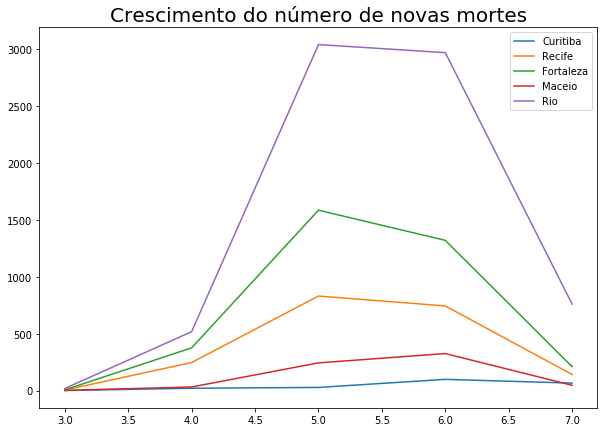

In [290]:
curitiba = casos_covid[casos_covid['city'] =='Curitiba']
recife = casos_covid[casos_covid['city'] =='Recife']
fortaleza = casos_covid[casos_covid['city'] =='Fortaleza']
maceio = casos_covid[casos_covid['city'] =='Maceió']
rio = casos_covid[casos_covid['city'] =='Rio de Janeiro']

curitiba.index = pd.to_datetime(curitiba['date'],format='%m/%d/%y %I:%M%p')
curitiba = curitiba.groupby(by=[curitiba.index.month])
curitiba = curitiba['new_deaths'].sum().sort_index().to_frame()

recife.index = pd.to_datetime(recife['date'],format='%m/%d/%y %I:%M%p')
recife = recife.groupby(by=[recife.index.month])
recife = recife['new_deaths'].sum().sort_index().to_frame()

fortaleza.index = pd.to_datetime(fortaleza['date'],format='%m/%d/%y %I:%M%p')
fortaleza = fortaleza.groupby(by=[fortaleza.index.month])
fortaleza = fortaleza['new_deaths'].sum().sort_index().to_frame()

maceio.index = pd.to_datetime(maceio['date'],format='%m/%d/%y %I:%M%p')
maceio = maceio.groupby(by=[maceio.index.month])
maceio = maceio['new_deaths'].sum().sort_index().to_frame()

rio.index = pd.to_datetime(rio['date'],format='%m/%d/%y %I:%M%p')
rio = rio.groupby(by=[rio.index.month])
rio = rio['new_deaths'].sum().sort_index().to_frame()

cmap = plt.get_cmap("Set2")
fig1, ax1 = plt.subplots(figsize=(10,7))

plt.plot(curitiba.index.values, curitiba['new_deaths'], label='Curitiba')
plt.plot(recife.index.values, recife['new_deaths'], label='Recife')
plt.plot(fortaleza.index.values, fortaleza['new_deaths'], label='Fortaleza')
plt.plot(maceio.index.values, maceio['new_deaths'], label='Maceio')
plt.plot(rio.index.values, rio['new_deaths'], label='Rio')
plt.title('Crescimento do número de novas mortes', fontsize=20)
plt.legend()

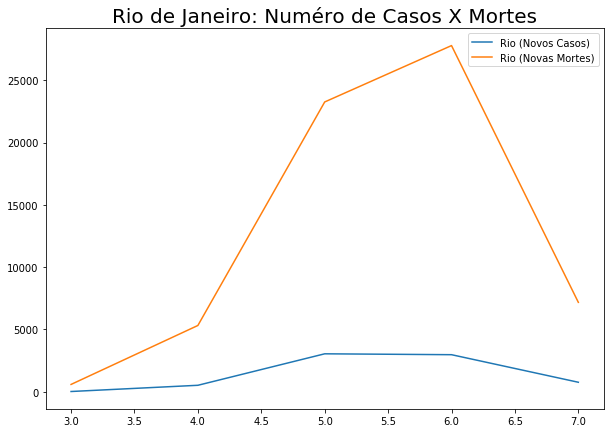

In [291]:
rio = casos_covid[casos_covid['city'] =='Rio de Janeiro']
rio.index = pd.to_datetime(rio['date'],format='%m/%d/%y %I:%M%p')
rio = rio.groupby(by=[rio.index.month])
rio_new_deaths = rio['new_deaths'].sum().sort_index().to_frame()
rio_new_confirmed = rio['new_confirmed'].sum().sort_index().to_frame()

cmap = plt.get_cmap("Set2")
fig1, ax1 = plt.subplots(figsize=(10,7))

plt.plot(rio_new_deaths.index.values, rio_new_deaths['new_deaths'], label='Rio (Novos Casos)')
plt.plot(rio_new_confirmed.index.values, rio_new_confirmed['new_confirmed'], label='Rio (Novas Mortes)')
plt.title('Rio de Janeiro: Numéro de Casos X Mortes', fontsize=20)
plt.legend()

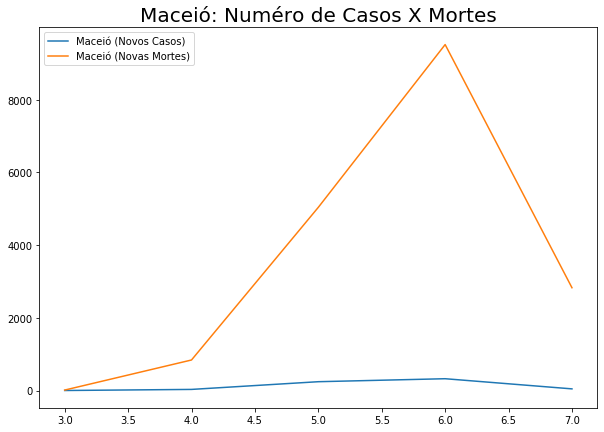

In [300]:
maceio = casos_covid[casos_covid['city'] =='Maceió']
maceio.index = pd.to_datetime(maceio['date'],format='%m/%d/%y %I:%M%p')
maceio = maceio.groupby(by=[maceio.index.month])
maceio_new_deaths = maceio['new_deaths'].sum().sort_index().to_frame()
maceio_new_confirmed = maceio['new_confirmed'].sum().sort_index().to_frame()

cmap = plt.get_cmap("Set2")
fig1, ax1 = plt.subplots(figsize=(10,7))

plt.plot(maceio_new_deaths.index.values, maceio_new_deaths['new_deaths'], label='Maceió (Novos Casos)')
plt.plot(maceio_new_confirmed.index.values, maceio_new_confirmed['new_confirmed'], label='Maceió (Novas Mortes)')
plt.title('Maceió: Numéro de Casos X Mortes', fontsize=20)
plt.legend()

<Figure size 432x288 with 0 Axes>

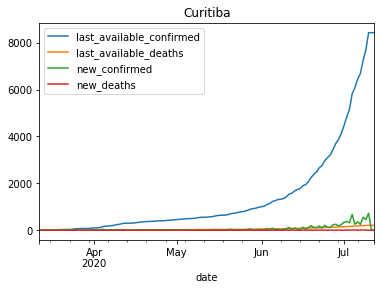

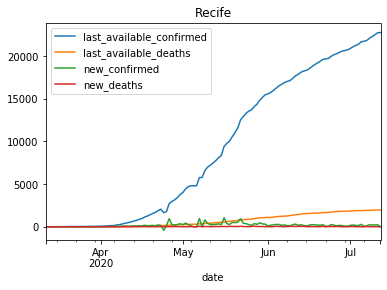

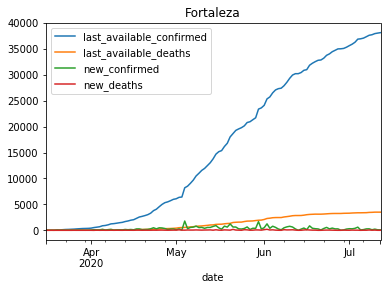

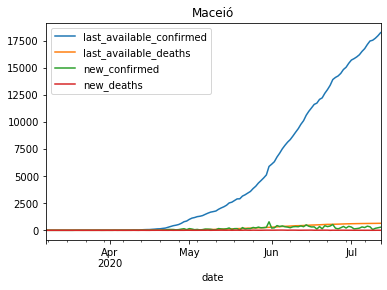

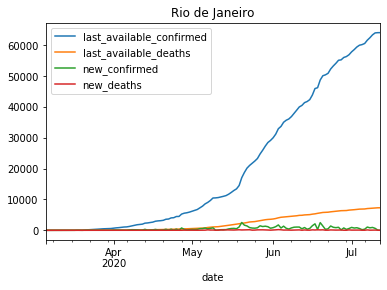

In [283]:
curitiba = casos_covid[casos_covid['city'] =='Curitiba']
recife = casos_covid[casos_covid['city'] =='Recife']
fortaleza = casos_covid[casos_covid['city'] =='Fortaleza']
maceio = casos_covid[casos_covid['city'] =='Maceió']
rio = casos_covid[casos_covid['city'] =='Rio de Janeiro']

plt.figure();

curitiba.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Curitiba')
plt.savefig('imagens/curitiba-metricas.jpeg')

recife.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Recife')
plt.savefig('imagens/recife-metricas.jpeg')

fortaleza.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Fortaleza')
plt.savefig('imagens/fortaleza-metricas.jpeg')

maceio.plot(x='date', y=[ 'last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Maceió')
plt.savefig('imagens/maceio-metricas.jpeg')

rio.plot(x='date', y=['last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths'], title='Rio de Janeiro')
plt.savefig('imagens/rio-metricas.jpeg')


<font size="4"> Questões </font>

1) Qual o nível de risco de cada cidade?
    
Para o período considerado nível de risco de risco para as cidades são parecidos quando consideremos o crescimento acelerado do número de casos para todas as cidades. As cidades de Maceio e Curitiba apresentam maior controle do número de mortes.
Enquanto Recife, Forteleza e Rio de Janeiro o total de mortes é maior.
As cidade de Maceio e Recife possuem maiores percentuais de casos por população, o que poderia representar um alerta para um possível aumento repentino do número de mortos e taxa de ocupação dos leitos.
    
2) Quais medidas de prevenção deveriam ser aplicadas em cada cidade?

Em todas as cidades um possível lockdown seria uma medida eficaz principalmente em Curitiba onde vemos de junho para julho um aumento repentino no número de novos casos, o que pode causar uma alta demanda ao sistema de saúde. Hospitais de campanha em Curitiba poderia auxiliar, visto que o lockdown tem um efeito a longo prazo. No Rio de Janeiro hospitais de campanha ajudariam em uma próxima onda, visto que a cidade possui uma população maior que outras cidades e que apesar do número de mortos está diminuindo uma possível nova onda poderia reverter esse cenário.


3) Dentre estas cidades, quais devem ter prioridade na alocação de recursos para o combate à COVID19?

As prioridades devem ser direcionadas principalmente para o Rio de Janeiro que possui alta taxa de mortalidade.
Importante atentar-se também para Maceio e Recife que possuem percentual elevado de casos para suas populações.